# Seeding for reproductibility

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Importing the dependencies

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


# Data Loading

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data Preprocessing

In [5]:
type(train_images)

numpy.ndarray

In [6]:
type(train_labels)

numpy.ndarray

In [8]:
print(len(train_images))

60000


In [9]:
print(len(train_labels))

60000


In [10]:
print(train_images[0].shape)

(28, 28)


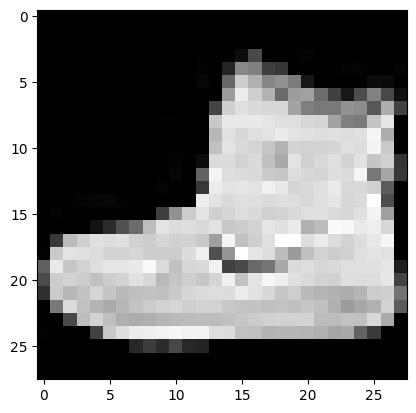

In [11]:
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [12]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [13]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [14]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Convolutional Neural Network

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# training

In [17]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.7489 - loss: 0.6951 - val_accuracy: 0.8695 - val_loss: 0.3626
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.8779 - loss: 0.3357 - val_accuracy: 0.8835 - val_loss: 0.3260
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8975 - loss: 0.2822 - val_accuracy: 0.8895 - val_loss: 0.3024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9085 - loss: 0.2481 - val_accuracy: 0.8976 - val_loss: 0.2817
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9184 - loss: 0.2195 - val_accuracy: 0.8994 - val_loss: 0.2864
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9265 - loss: 0.1969 - val_accuracy: 0.9002 - val_loss: 0.2927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9340 - loss: 0.1760 - val_accuracy: 0.9014 - val_loss: 0.2928
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9412 -

# Model Evaluation

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.3371
Test accuracy: 0.902899980545044


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.3371
Test accuracy: 0.902899980545044


Text(0, 0.5, 'Accuracy')

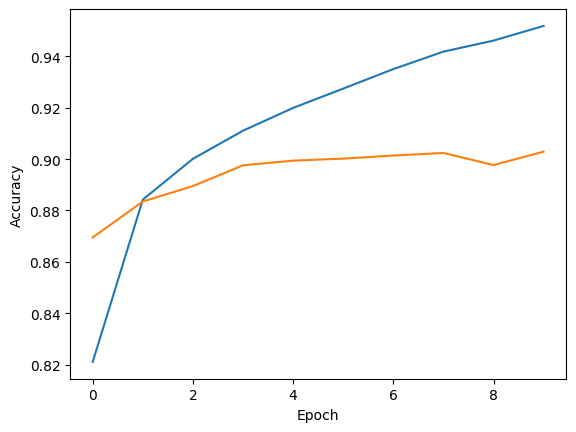

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Save the model

In [21]:
model.save('trained_fashion_mnist_model.h5')